In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [40]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
#training linear regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X,y)

LinearRegression()

In [6]:
#Polynomial Regression model

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)


LinearRegression()

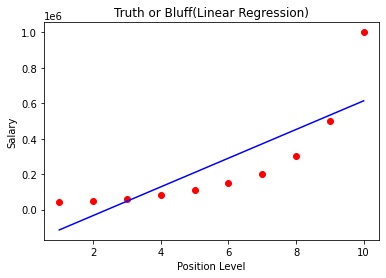

In [43]:
#Visualizing the linear regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_regressor.predict(X),color='blue')
plt.title('Truth or Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

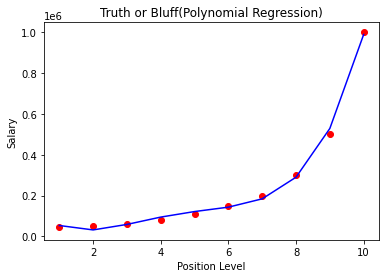

In [44]:
#Visualizing the polynomial regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [46]:
#Predicting a new result with Linear Regression

lin_regressor.predict([[6.5]])

array([330378.78787879])

In [51]:
#Predicting a new result with Polynomial regression
pol_build = PolynomialFeatures(degree=4)
lin_reg2.predict(pol_build.fit_transform([[6.5]]))

array([158862.45265155])

In [52]:
#Choosing the optimal model complexity
#Create a different order polynomial
#Split polynomail feature into test and train
#Fit on train
#Store/save rmse for Both the train and test
#Plot the results(error vs poly order)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.2)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

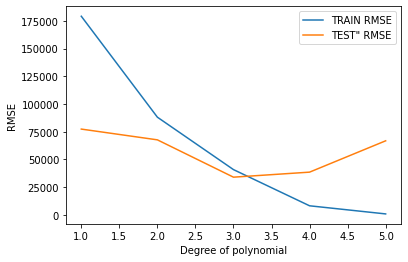

In [8]:
plt.plot(range(1,6),train_rmse_errors[:5],label ='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label ='TEST" RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of polynomial')
plt.legend()